In [4]:

import pandas as pd 
import numpy as np
import seaborn as sns
import pycaret
from pycaret.anomaly import *
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
df = pd.read_csv('C:/Users/prati/OneDrive - University Of Houston/Acadmics/Data Mining/PS-2/Complex8_N15.csv')


In [5]:
df.index = df.index+1
df.columns

Index(['Unnamed: 0', 'V1', 'V2', 'V3'], dtype='object')

In [6]:
df.drop (['Unnamed: 0'], axis=1, inplace=True)

<AxesSubplot:xlabel='V1', ylabel='V2'>

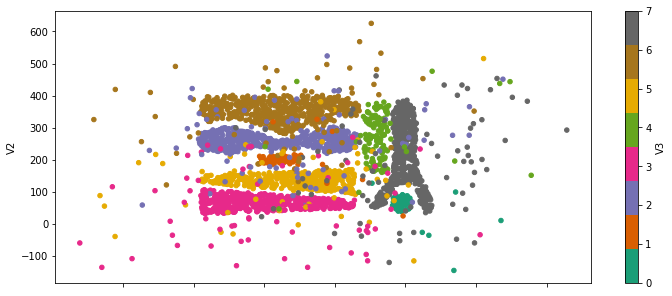

In [13]:
df.plot.scatter('V1', 'V2', c='V3', colormap = 'Dark2', figsize=(12,5))

In [8]:
df_sub = df[["V1", "V2"]]
df_sub

,V1,V2
1,563.225000,56.748000
2,564.887000,58.119000
3,565.434000,68.061000
4,565.926000,79.953000
5,566.762000,69.405000
...,...,...
2929,830.491459,169.489523
2930,202.010517,355.093765
2931,296.470839,309.699569
2932,110.791454,249.134890


# Outlier Detection using Pycaret KNN model

In [9]:
model = setup(df_sub, numeric_features=['V1', 'V2'], categorical_features=None)

Setup Succesfully Completed!


,Description,Value
0,session_id,2004
1,Original Data,"(2933, 2)"
2,Missing Values,False
3,Numeric Features,1
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(2933, 2)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [10]:
knn = create_model("knn", fraction=0.15)

In [11]:
knn_df = assign_model(knn, score=True)
knn_df

,V1,V2,Label,Score
1,563.225000,56.748000,0,11.526650
2,564.887000,58.119000,0,11.273942
3,565.434000,68.061000,0,8.534829
4,565.926000,79.953000,0,10.581077
5,566.762000,69.405000,0,7.336805
...,...,...,...,...
2929,830.491459,169.489523,1,68.477245
2930,202.010517,355.093765,0,10.253525
2931,296.470839,309.699569,0,11.010923
2932,110.791454,249.134890,0,11.046255


In [19]:
tune_model(model=knn)

SystemExit: (Value Error): Model Not Available for Tuning. Please see docstring for list of available models.

In [15]:
knn_pred = predict_model(knn, data= df_sub)
print(knn_pred)

              V1          V2  Label      Score
1     563.225000   56.748000      0  11.505818
2     564.887000   58.119000      0   9.957036
3     565.434000   68.061000      0   7.224665
4     565.926000   79.953000      0   9.117713
5     566.762000   69.405000      0   6.665720
...          ...         ...    ...        ...
2929  830.491459  169.489523      1  63.135645
2930  202.010517  355.093765      0   6.462760
2931  296.470839  309.699569      0  10.516865
2932  110.791454  249.134890      0   9.769675
2933  294.296605  144.912010      0   5.228934

[2933 rows x 4 columns]


In [86]:
knn_anomaly_rows = knn_pred[knn_pred['Label'] == 1]
knn_anomaly_rows

,V1,V2,Label,Score
57,612.120000,50.623000,1,15.167730
61,185.148000,187.840000,1,14.398695
62,186.379000,210.891000,1,20.268333
103,272.218000,187.568000,1,15.072763
114,295.307000,185.377000,1,15.456188
...,...,...,...,...
2922,65.623287,328.050444,1,14.266396
2923,867.249028,437.815442,1,32.700762
2925,647.641718,-26.150833,1,64.308404
2928,493.033659,-7.090251,1,23.083617


In [87]:
knn_pred.sort_values(by=['Score'], ascending=False, inplace=True)
knn_pred

,V1,V2,Label,Score
2884,-260.826641,-135.295733,1,191.041969
2851,1057.381435,292.557139,1,185.111825
2751,-283.459797,325.352742,1,181.132322
2907,-222.692610,419.199246,1,178.832565
2607,956.494535,151.661096,1,161.037262
...,...,...,...,...
674,44.549000,96.843000,0,2.853838
235,103.919000,268.385000,0,2.657125
670,42.029000,96.977000,0,2.595230
672,43.616000,99.011000,0,2.579869


In [88]:
df['Ols'] = knn_pred['Score']
df.sort_values(by=['Ols'], ascending=False, inplace=True)
df

,V1,V2,V3,Ols
2884,-260.826641,-135.295733,3,191.041969
2851,1057.381435,292.557139,7,185.111825
2751,-283.459797,325.352742,6,181.132322
2907,-222.692610,419.199246,6,178.832565
2607,956.494535,151.661096,4,161.037262
...,...,...,...,...
674,44.549000,96.843000,3,2.853838
235,103.919000,268.385000,2,2.657125
670,42.029000,96.977000,3,2.595230
672,43.616000,99.011000,3,2.579869


In [89]:
df93 = df[~df.isin(df7)].dropna()

pd.merge(df93,df7, how='inner')

,V1,V2,V3,Ols


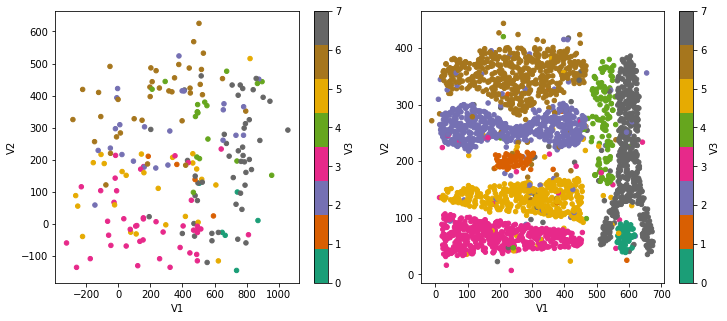

In [90]:
df7 = df.head(int(len(df)*(7/100)))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
df7.plot.scatter('V1', 'V2', c= 'V3', colormap = 'Dark2', ax=axes[0])
df93.plot.scatter('V1', 'V2', c= 'V3', colormap = 'Dark2', ax=axes[1])

In [65]:
df14 = df.head(int(len(df)*(14/100)))
df86 = df[~df.isin(df14)].dropna()

pd.merge(df86,df14, how='inner')


,V1,V2,V3,Ols


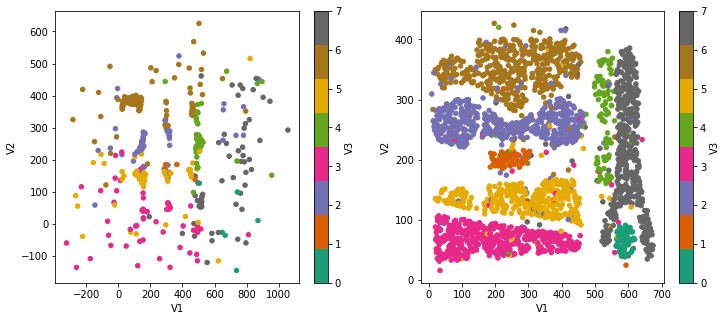

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
df14.plot.scatter('V1', 'V2', c= 'V3', colormap = 'Dark2', ax=axes[0])
df86.plot.scatter('V1', 'V2', c= 'V3', colormap = 'Dark2', ax=axes[1])

In [66]:
df21 = df.head(int(len(df)*(21/100)))
df79 = df[~df.isin(df21)].dropna()

pd.merge(df79,df21, how='inner')

,V1,V2,V3,Ols


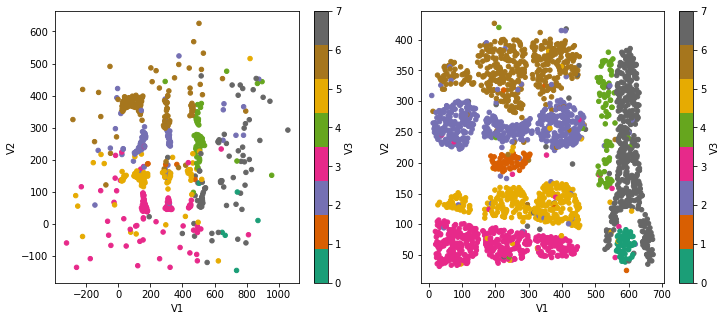

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
df21.plot.scatter('V1', 'V2', c= 'V3', colormap = 'Dark2', ax=axes[0])
df79.plot.scatter('V1', 'V2', c= 'V3', colormap = 'Dark2', ax=axes[1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A9C928FC8>]],
      dtype=object)

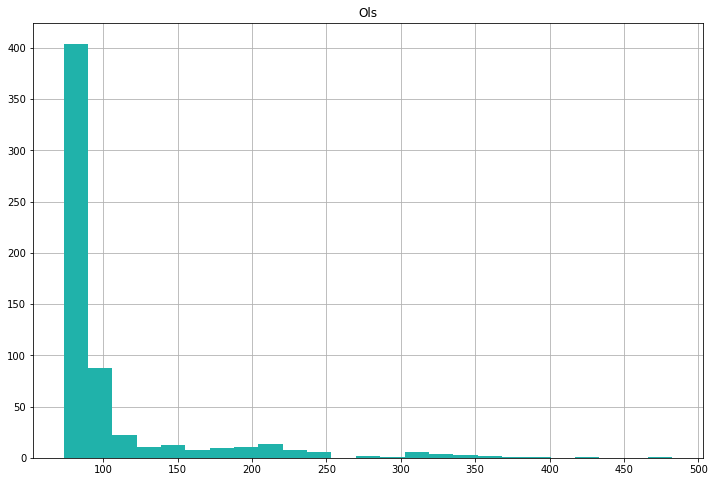

In [81]:
df21.hist(column='Ols', bins=25, figsize=(12,8), zorder=2 , rwidth=1.2, color= 'lightseagreen')
    